JOB DONE 0:02:34.134865


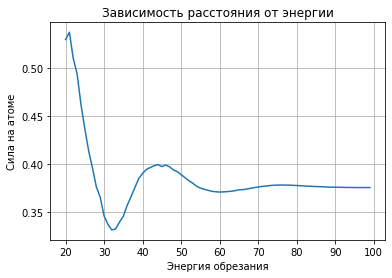

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
start_time = datetime.now()

output = open('x.txt', 'w')
output = open('y.txt', 'w')

with open('C.scf.in') as f:
    lines = f.readlines()
for cut in np.arange(20, 100, 1):
    lines[14] = '      ecutwfc = {},'.format(cut)
    with open('input.in', 'w') as f:
        for l in lines:
             f.write(l)

    os.system('../bin/pw.x < input.in > output.txt')

    with open ('output.txt')as f:
        for l in f.readlines():
            if 'Total force =' in l:
                #print(cut, l[21:30])
                output = open('x.txt', 'a')
                print(cut, file = output)
                output = open('y.txt', 'a')
                print(l[21:30], file = output )
                output.close()
               
x = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')
plt.title('Зависимость расстояния от энергии')
plt.xlabel('Энергия обрезания')
plt.ylabel('Сила на атоме')
plt.grid()
plt.plot(x,y)
plt.savefig('result.jpg')
time.sleep(1)
print('JOB DONE', datetime.now() - start_time)

    Пояснения: максимальная сходимость по силе на атоме достигается при энергии обрезания в 60 Ryd. Дальнейшее увеличение радиуса обрезания ведет к увеличению затрат вычислительных мощностей (более, чем половину времени работы скрипта заняло вычисление после 60 Ryd)

 &CONTROL
                 calculation = 'scf' ,
                restart_mode = 'from_scratch' ,
                      outdir = '/mnt/d/qe-6.5/task1/' ,
                  pseudo_dir = '/mnt/d/qe-6.5/task1/' ,
                      prefix = 'diamond' ,
                     tstress = .true. ,
                     tprnfor = .true. ,
 /
 &SYSTEM
                       ibrav = 2,
                   celldm(1) = 6.6,
                         nat = 2,
                        ntyp = 1,
                     ecutwfc = 20 ,
 /
 &ELECTRONS
                    conv_thr = 1.0d-8 ,
                 mixing_mode = 'plain' ,
                 mixing_beta = 0.7 ,
             diagonalization = 'david' ,
 /
ATOMIC_SPECIES
    C   12.01100  C.pz-vbc.UPF 
ATOMIC_POSITIONS 
    C      0.000000000    0.000000000    0.000000000    
    C      0.250000000    0.250000000    0.300000000    
K_POINTS automatic 
  6 6 6   0 0 0 

Program PWSCF v.6.5 starts on 19May2020 at 23: 4:49 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Parallel version (MPI), running on     1 processors

     MPI processes distributed on     1 nodes
     Waiting for input...
     Reading input from standard input
     Message from routine read_cards :
     DEPRECATED: no units specified in ATOMIC_POSITIONS card
     Message from routine read_cards :
     ATOMIC_POSITIONS: units set to alat

     Current dimensions of program PWSCF are:
     Max number of different atomic species (ntypx) = 10
     Max number of k-points (npk) =  40000
     Max angular momentum in pseudopotentials (lmaxx) =  3

     Subspace diagonalization in iterative solution of the eigenvalue problem:
     a serial algorithm will be used


     G-vector sticks info
     --------------------
     sticks:   dense  smooth     PW     G-vecs:    dense   smooth      PW
     Sum         595     595    187                 9577     9577    1687



     bravais-lattice index     =            2
     lattice parameter (alat)  =       6.6000  a.u.
     unit-cell volume          =      71.8740 (a.u.)^3
     number of atoms/cell      =            2
     number of atomic types    =            1
     number of electrons       =         8.00
     number of Kohn-Sham states=            4
     kinetic-energy cutoff     =      99.0000  Ry
     charge density cutoff     =     396.0000  Ry
     convergence threshold     =      1.0E-08
     mixing beta               =       0.7000
     number of iterations used =            8  plain     mixing
     Exchange-correlation=  SLA  PZ   NOGX NOGC
                           (   1   1   0   0   0   0   0)

     celldm(1)=   6.600000  celldm(2)=   0.000000  celldm(3)=   0.000000
     celldm(4)=   0.000000  celldm(5)=   0.000000  celldm(6)=   0.000000

     crystal axes: (cart. coord. in units of alat)
               a(1) = (  -0.500000   0.000000   0.500000 )  
               a(2) = (   0.000000   0.500000   0.500000 )  
               a(3) = (  -0.500000   0.500000   0.000000 )  

     reciprocal axes: (cart. coord. in units 2 pi/alat)
               b(1) = ( -1.000000 -1.000000  1.000000 )  
               b(2) = (  1.000000  1.000000  1.000000 )  
               b(3) = ( -1.000000  1.000000 -1.000000 )  


     PseudoPot. # 1 for C  read from file:
     /mnt/d/qe-6.5/task1/C.pz-vbc.UPF
     MD5 check sum: 902016046bf83189dffe9ec1c2a452ce
     Pseudo is Norm-conserving, Zval =  4.0
     Generated by new atomic code, or converted to UPF format
     Using radial grid of  269 points,  1 beta functions with: 
                l(1) =   0

     atomic species   valence    mass     pseudopotential
        C              4.00    12.01100     C ( 1.00)

      4 Sym. Ops. (no inversion) found



   Cartesian axes

     site n.     atom                  positions (alat units)
         1           C   tau(   1) = (   0.0000000   0.0000000   0.0000000  )
         2           C   tau(   2) = (   0.2500000   0.2500000   0.3000000  )

     number of k points=    46
                       cart. coord. in units 2pi/alat
        k(    1) = (   0.0000000   0.0000000   0.0000000), wk =   0.0092593
        k(    2) = (  -0.1666667   0.1666667  -0.1666667), wk =   0.0370370
        k(    3) = (  -0.3333333   0.3333333  -0.3333333), wk =   0.0370370
        k(    4) = (   0.5000000  -0.5000000   0.5000000), wk =   0.0185185
        k(    5) = (   0.0000000   0.3333333   0.0000000), wk =   0.0370370
        k(    6) = (  -0.1666667   0.5000000  -0.1666667), wk =   0.0740741
        k(    7) = (   0.6666667  -0.3333333   0.6666667), wk =   0.0740741
        k(    8) = (   0.5000000  -0.1666667   0.5000000), wk =   0.0740741
        k(    9) = (   0.3333333   0.0000000   0.3333333), wk =   0.0740741
        k(   10) = (   0.0000000   0.6666667   0.0000000), wk =   0.0370370
        k(   11) = (   0.8333333  -0.1666667   0.8333333), wk =   0.0740741
        k(   12) = (   0.6666667  -0.0000000   0.6666667), wk =   0.0740741
        k(   13) = (   0.0000000  -1.0000000   0.0000000), wk =   0.0185185
        k(   14) = (   0.6666667  -0.3333333   1.0000000), wk =   0.0370370
        k(   15) = (   0.5000000  -0.1666667   0.8333333), wk =   0.0740741
        k(   16) = (  -0.3333333  -1.0000000   0.0000000), wk =   0.0370370
        k(   17) = (   0.1666667   0.1666667  -0.1666667), wk =   0.0370370
        k(   18) = (   0.3333333   0.3333333  -0.3333333), wk =   0.0370370
        k(   19) = (  -0.5000000  -0.5000000   0.5000000), wk =   0.0185185
        k(   20) = (   0.0000000   0.0000000   0.3333333), wk =   0.0185185
        k(   21) = (   0.5000000   0.1666667  -0.1666667), wk =   0.0740741
        k(   22) = (   0.1666667  -0.1666667   0.5000000), wk =   0.0370370
        k(   23) = (   0.1666667   0.1666667  -0.5000000), wk =   0.0370370
        k(   24) = (  -0.3333333  -0.6666667   0.6666667), wk =   0.0740741
        k(   25) = (  -0.6666667   0.6666667  -0.3333333), wk =   0.0370370
        k(   26) = (  -0.6666667  -0.6666667   0.3333333), wk =   0.0370370
        k(   27) = (  -0.1666667  -0.5000000   0.5000000), wk =   0.0740741
        k(   28) = (  -0.5000000   0.5000000  -0.1666667), wk =   0.0370370
        k(   29) = (  -0.5000000  -0.5000000   0.1666667), wk =   0.0370370
        k(   30) = (  -0.3333333   0.3333333   0.0000000), wk =   0.0185185
        k(   31) = (  -0.3333333  -0.3333333   0.0000000), wk =   0.0185185
        k(   32) = (   0.0000000   0.0000000   0.6666667), wk =   0.0185185
        k(   33) = (  -0.1666667  -0.8333333   0.8333333), wk =   0.0740741
        k(   34) = (  -0.8333333   0.8333333  -0.1666667), wk =   0.0370370
        k(   35) = (  -0.8333333  -0.8333333   0.1666667), wk =   0.0370370
        k(   36) = (  -0.6666667   0.6666667   0.0000000), wk =   0.0185185
        k(   37) = (  -0.6666667  -0.6666667   0.0000000), wk =   0.0185185
        k(   38) = (   0.0000000   0.0000000  -1.0000000), wk =   0.0092593
        k(   39) = (  -0.3333333  -0.6666667   1.0000000), wk =   0.0370370
        k(   40) = (   1.0000000   0.3333333   0.6666667), wk =   0.0740741
        k(   41) = (  -0.6666667   1.0000000  -0.3333333), wk =   0.0740741
        k(   42) = (  -0.1666667  -0.5000000   0.8333333), wk =   0.0740741
        k(   43) = (   0.8333333   0.1666667   0.5000000), wk =   0.0370370
        k(   44) = (  -0.8333333   0.1666667  -0.5000000), wk =   0.0370370
        k(   45) = (   0.0000000   1.0000000  -0.3333333), wk =   0.0370370
        k(   46) = (   0.3333333   0.0000000  -1.0000000), wk =   0.0370370

     Dense  grid:     9577 G-vectors     FFT dimensions: (  30,  30,  30)

     Estimated max dynamical RAM per process >       9.92 MB

     Initial potential from superposition of free atoms

     starting charge    7.99994, renormalised to    8.00000
     Starting wfcs are    8 randomized atomic wfcs

     total cpu time spent up to now is        0.4 secs

     Self-consistent Calculation

     iteration #  1     ecut=    99.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  1.00E-02,  avg # of iterations =  2.0

     total cpu time spent up to now is        1.1 secs

     total energy              =     -22.73845606 Ry
     Harris-Foulkes estimate   =     -22.82337504 Ry
     estimated scf accuracy    <       0.15604343 Ry

     iteration #  2     ecut=    99.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  1.95E-03,  avg # of iterations =  2.0

     total cpu time spent up to now is        1.6 secs

     total energy              =     -22.75413266 Ry
     Harris-Foulkes estimate   =     -22.75463273 Ry
     estimated scf accuracy    <       0.00183604 Ry

     iteration #  3     ecut=    99.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  2.30E-05,  avg # of iterations =  2.1

     total cpu time spent up to now is        2.1 secs

     total energy              =     -22.75454390 Ry
     Harris-Foulkes estimate   =     -22.75455408 Ry
     estimated scf accuracy    <       0.00006995 Ry

     iteration #  4     ecut=    99.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  8.74E-07,  avg # of iterations =  2.7

     total cpu time spent up to now is        2.7 secs

     total energy              =     -22.75456252 Ry
     Harris-Foulkes estimate   =     -22.75456405 Ry
     estimated scf accuracy    <       0.00000208 Ry

     iteration #  5     ecut=    99.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  2.60E-08,  avg # of iterations =  2.6

     total cpu time spent up to now is        3.3 secs

     total energy              =     -22.75456366 Ry
     Harris-Foulkes estimate   =     -22.75456335 Ry
     estimated scf accuracy    <       0.00000004 Ry

     iteration #  6     ecut=    99.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  5.43E-10,  avg # of iterations =  2.6

     total cpu time spent up to now is        3.9 secs

     End of self-consistent calculation

          k = 0.0000 0.0000 0.0000 (  1243 PWs)   bands (ev):

    -7.8463  11.4471  14.7628  17.1528

          k =-0.1667 0.1667-0.1667 (  1203 PWs)   bands (ev):

    -7.0654   8.9947  12.8447  14.9325

          k =-0.3333 0.3333-0.3333 (  1176 PWs)   bands (ev):

    -4.7564   3.9250  10.9966  13.3565

          k = 0.5000-0.5000 0.5000 (  1194 PWs)   bands (ev):

    -1.4416  -0.5258  10.3828  12.8398

          k = 0.0000 0.3333 0.0000 (  1199 PWs)   bands (ev):

    -6.8006   9.6002  11.7593  13.7651

          k =-0.1667 0.5000-0.1667 (  1207 PWs)   bands (ev):

    -5.0111   5.8510   9.8750  12.2356

          k = 0.6667-0.3333 0.6667 (  1201 PWs)   bands (ev):

    -1.8113   1.1744   8.9727  10.7766

          k = 0.5000-0.1667 0.5000 (  1192 PWs)   bands (ev):

    -2.9971   2.7705   8.5682  11.3915

          k = 0.3333 0.0000 0.3333 (  1193 PWs)   bands (ev):

    -5.7587   7.7156   9.1701  13.3888

          k = 0.0000 0.6667 0.0000 (  1218 PWs)   bands (ev):

    -3.7334   6.0830   8.7905   9.4889

          k = 0.8333-0.1667 0.8333 (  1195 PWs)   bands (ev):

    -1.0597   3.0962   6.7558   8.5470

          k = 0.6667-0.0000 0.6667 (  1196 PWs)   bands (ev):

    -0.1720   2.8281   4.3122   9.5677

          k = 0.0000-1.0000 0.0000 (  1186 PWs)   bands (ev):

     1.0100   1.0100   7.8003   7.8003

          k = 0.6667-0.3333 1.0000 (  1192 PWs)   bands (ev):

    -2.7728   4.2445   6.6784  10.4318

          k = 0.5000-0.1667 0.8333 (  1192 PWs)   bands (ev):

     0.3618   1.2543   5.8192   8.7393

          k =-0.3333-1.0000 0.0000 (  1186 PWs)   bands (ev):

     1.3712   1.9007   5.7573   6.3873

          k = 0.1667 0.1667-0.1667 (  1203 PWs)   bands (ev):

    -7.0530  10.8124  10.8995  14.6629

          k = 0.3333 0.3333-0.3333 (  1176 PWs)   bands (ev):

    -4.7267   4.8746   9.8189  13.3364

          k =-0.5000-0.5000 0.5000 (  1194 PWs)   bands (ev):

    -1.9229   0.7238   9.4100  12.9019

          k = 0.0000 0.0000 0.3333 (  1199 PWs)   bands (ev):

    -6.7921   9.7105  12.3165  12.5540

          k = 0.5000 0.1667-0.1667 (  1207 PWs)   bands (ev):

    -4.9843   7.3012   8.7143  11.4154

          k = 0.1667-0.1667 0.5000 (  1207 PWs)   bands (ev):

    -4.9836   6.0781  10.1668  11.1140

          k = 0.1667 0.1667-0.5000 (  1207 PWs)   bands (ev):

    -4.9747   7.0699   8.6401  11.6773

          k =-0.3333-0.6667 0.6667 (  1201 PWs)   bands (ev):

    -1.9505   2.2017   7.6960  10.9837

          k =-0.6667 0.6667-0.3333 (  1201 PWs)   bands (ev):

    -1.7815   1.2005   8.4488  11.1225

          k =-0.6667-0.6667 0.3333 (  1201 PWs)   bands (ev):

    -1.9237   2.1178   8.4862   9.9725

          k =-0.1667-0.5000 0.5000 (  1192 PWs)   bands (ev):

    -3.0147   3.6656   7.2487  11.8722

          k =-0.5000 0.5000-0.1667 (  1192 PWs)   bands (ev):

    -3.0287   2.7283   7.8688  12.5334

          k =-0.5000-0.5000 0.1667 (  1192 PWs)   bands (ev):

    -3.0148   3.7496   9.0783   9.3068

          k =-0.3333 0.3333 0.0000 (  1193 PWs)   bands (ev):

    -5.7884   6.8359   9.4748  14.8425

          k =-0.3333-0.3333 0.0000 (  1193 PWs)   bands (ev):

    -5.7461   9.1318   9.7755  10.5251

          k = 0.0000 0.0000 0.6667 (  1218 PWs)   bands (ev):

    -3.6929   7.1161   7.3471   9.3277

          k =-0.1667-0.8333 0.8333 (  1195 PWs)   bands (ev):

    -1.1130   4.0962   5.5996   8.6422

          k =-0.8333 0.8333-0.1667 (  1195 PWs)   bands (ev):

    -1.0032   3.8559   5.1644   9.0024

          k =-0.8333-0.8333 0.1667 (  1195 PWs)   bands (ev):

    -1.0436   3.9677   6.8433   7.0339

          k =-0.6667 0.6667 0.0000 (  1196 PWs)   bands (ev):

     0.0115   2.2972   4.0719  10.2202

          k =-0.6667-0.6667 0.0000 (  1196 PWs)   bands (ev):

    -0.3185   3.8109   4.6016   7.8688

          k = 0.0000 0.0000-1.0000 (  1186 PWs)   bands (ev):

     0.7209   1.7310   6.4313   8.2133

          k =-0.3333-0.6667 1.0000 (  1192 PWs)   bands (ev):

    -2.7533   6.5101   6.5595   7.5979

          k = 1.0000 0.3333 0.6667 (  1192 PWs)   bands (ev):

    -2.7576   4.9015   6.5640   9.6530

          k =-0.6667 1.0000-0.3333 (  1192 PWs)   bands (ev):

    -2.7250   5.2072   6.1974   9.4399

          k =-0.1667-0.5000 0.8333 (  1192 PWs)   bands (ev):

    -0.1967   2.7203   5.8811   7.4865

          k = 0.8333 0.1667 0.5000 (  1192 PWs)   bands (ev):

    -0.2179   2.8184   4.8352   8.7604

          k =-0.8333 0.1667-0.5000 (  1192 PWs)   bands (ev):

     0.3290   1.1783   7.2180   7.4499

          k = 0.0000 1.0000-0.3333 (  1186 PWs)   bands (ev):

     1.5815   1.5816   6.1584   6.1584

          k = 0.3333 0.0000-1.0000 (  1186 PWs)   bands (ev):

     1.2134   2.5369   4.8218   6.6547

     highest occupied level (ev):    17.1528

!    total energy              =     -22.75456368 Ry
     Harris-Foulkes estimate   =     -22.75456368 Ry
     estimated scf accuracy    <          1.7E-09 Ry

     The total energy is the sum of the following terms:

     one-electron contribution =       8.58758276 Ry
     hartree contribution      =       1.84603656 Ry
     xc contribution           =      -7.16893137 Ry
     ewald contribution        =     -26.01925162 Ry

     convergence has been achieved in   6 iterations

     Forces acting on atoms (cartesian axes, Ry/au):

     atom    1 type  1   force =     0.00000000    0.00000000    0.26536167
     atom    2 type  1   force =     0.00000000    0.00000000   -0.26536167

     Total force =     0.375278     Total SCF correction =     0.000009


     Computing stress (Cartesian axis) and pressure

          total   stress  (Ry/bohr**3)                   (kbar)     P=      256.60
   0.00197064  -0.00102672   0.00000000          289.89     -151.04        0.00
  -0.00102672   0.00197064   0.00000000         -151.04      289.89        0.00
   0.00000000   0.00000000   0.00129173            0.00        0.00      190.02


     Writing output data file /mnt/d/qe-6.5/task1/diamond.save/

     init_run     :      0.42s CPU      0.42s WALL (       1 calls)
     electrons    :      3.45s CPU      3.52s WALL (       1 calls)
     forces       :      0.02s CPU      0.01s WALL (       1 calls)
     stress       :      0.02s CPU      0.02s WALL (       1 calls)

     Called by init_run:
     wfcinit      :      0.36s CPU      0.36s WALL (       1 calls)
     potinit      :      0.00s CPU      0.01s WALL (       1 calls)
     hinit0       :      0.03s CPU      0.03s WALL (       1 calls)

     Called by electrons:
     c_bands      :      2.95s CPU      2.99s WALL (       6 calls)
     sum_band     :      0.50s CPU      0.50s WALL (       6 calls)
     v_of_rho     :      0.00s CPU      0.02s WALL (       7 calls)
     mix_rho      :      0.00s CPU      0.01s WALL (       6 calls)

     Called by c_bands:
     init_us_2    :      0.02s CPU      0.03s WALL (     690 calls)
     cegterg      :      2.95s CPU      2.95s WALL (     276 calls)

     Called by sum_band:

     Called by *egterg:
     h_psi        :      3.11s CPU      3.05s WALL (     962 calls)
     g_psi        :      0.03s CPU      0.02s WALL (     640 calls)
     cdiaghg      :      0.06s CPU      0.03s WALL (     916 calls)

     Called by h_psi:
     h_psi:calbec :      0.02s CPU      0.02s WALL (     962 calls)
     vloc_psi     :      3.06s CPU      3.02s WALL (     962 calls)
     add_vuspsi   :      0.03s CPU      0.01s WALL (     962 calls)

     General routines
     calbec       :      0.02s CPU      0.02s WALL (    1192 calls)
     fft          :      0.02s CPU      0.03s WALL (      25 calls)
     ffts         :      0.00s CPU      0.01s WALL (       6 calls)
     fftw         :      3.39s CPU      3.27s WALL (    8186 calls)

     Parallel routines

     PWSCF        :      3.92s CPU      4.00s WALL


   This run was terminated on:  23: 4:53  19May2020            

=------------------------------------------------------------------------------=
   JOB DONE.
=------------------------------------------------------------------------------=